In [1]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [2]:
file_name=r"N:\My Document\Project\Major\code-1\Data-Science-Projects-main\Machine learning\Natural language processing\DDoS Attack Classification\data\DDos.csv"
df=pd.read_csv(file_name)
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66232,80,48778,3,7,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
66233,80,78359838,8,6,56,11601,20,0,7.000000,5.656854,...,20.0,30018.0,0.0,30018.0,30018.0,78300000.0,0.0,78300000.0,78300000.0,DDoS
66234,80,50518,3,6,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
66235,80,78336816,8,6,56,11601,20,0,7.000000,5.656854,...,20.0,22026.0,0.0,22026.0,22026.0,78300000.0,0.0,78300000.0,78300000.0,DDoS


In [3]:
dtypes=df.dtypes
print(df.select_dtypes(include='object').columns)
print(df.select_dtypes(exclude='object').columns)

Index([' Label'], dtype='object')
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length 

In [4]:
df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [5]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [6]:
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

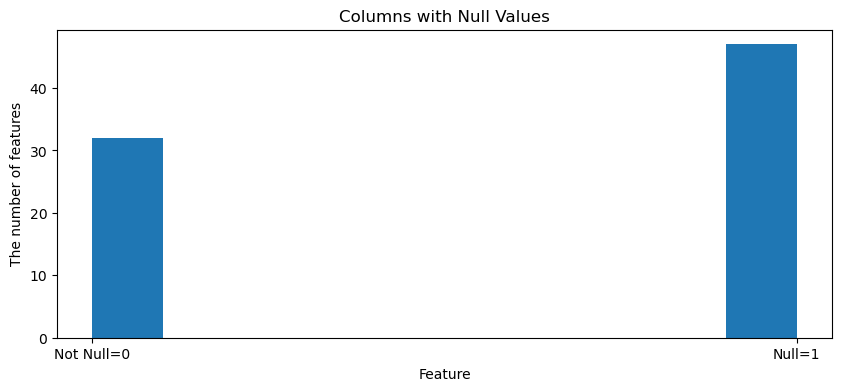

In [7]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

# Show the plot
plt.show()

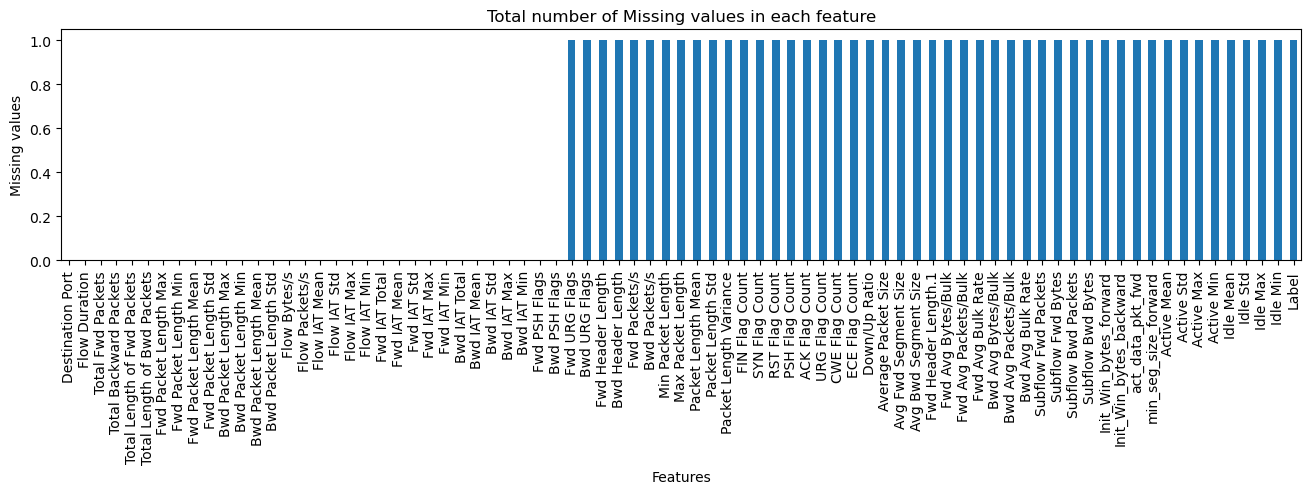

In [8]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16,3))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

In [9]:
## Removing the null values
data_f=df.dropna()


In [10]:
df.isna().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
Idle Std                       1
Idle Max                       1
Idle Min                       1
Label                          1
Length: 79, dtype: int64

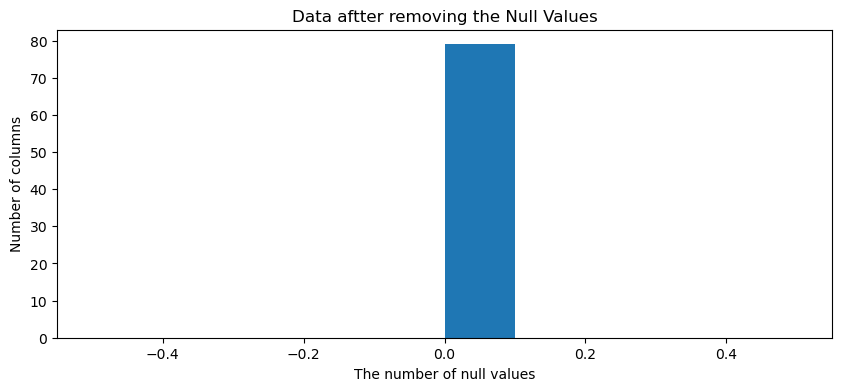

In [11]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Set the title and axis labels
plt.title('Data aftter removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')

# Show the plot
plt.show()

In [12]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
null_values=data_f.isnull().sum()  # Check for NaN values

In [13]:
# To know the data types of the columns

(data_f.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [14]:
# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

In [15]:
data_f

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66231,80,78317142,8,5,56,11607,20,0,7.000000,5.656854,...,20.0,15996.0,0.0,15996.0,15996.0,78200000.0,0.0,78200000.0,78200000.0,1
66232,80,48778,3,7,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
66233,80,78359838,8,6,56,11601,20,0,7.000000,5.656854,...,20.0,30018.0,0.0,30018.0,30018.0,78300000.0,0.0,78300000.0,78300000.0,1
66234,80,50518,3,6,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


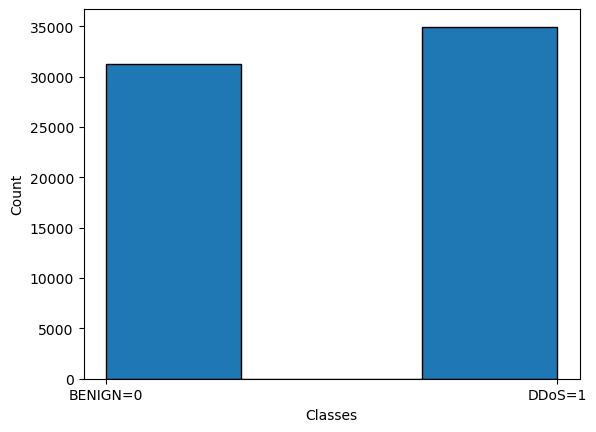

In [16]:
# Print the DataFrame

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

## Data Exploring

In [17]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,66237.000000,...,66236.000000,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04
mean,6454.605553,1.388736e+07,5.180262,5.119223,695.622567,6.716837e+03,351.442064,23.465797,110.715335,135.438642,...,3.447793,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06
std,16710.894455,2.815843e+07,16.873659,23.797124,3230.046907,4.222698e+04,1435.510506,136.608403,400.376692,613.421563,...,13.108006,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.995600e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,9.949050e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.639831e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,4.000000,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


## Plot the distribution of the features:

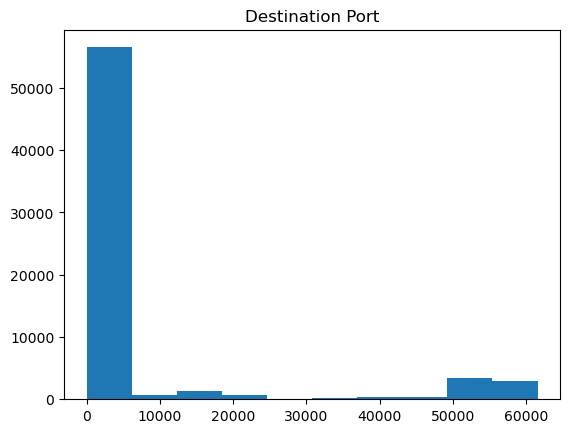

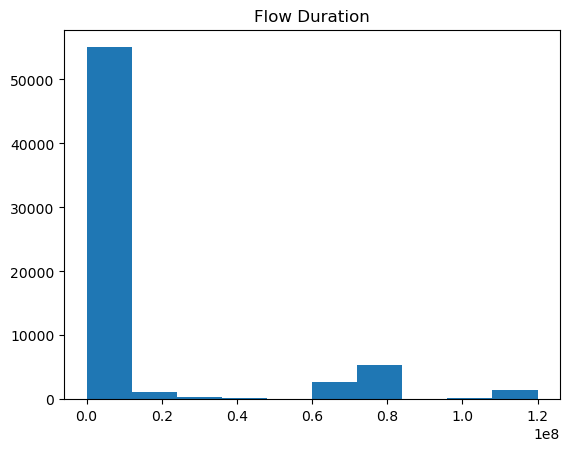

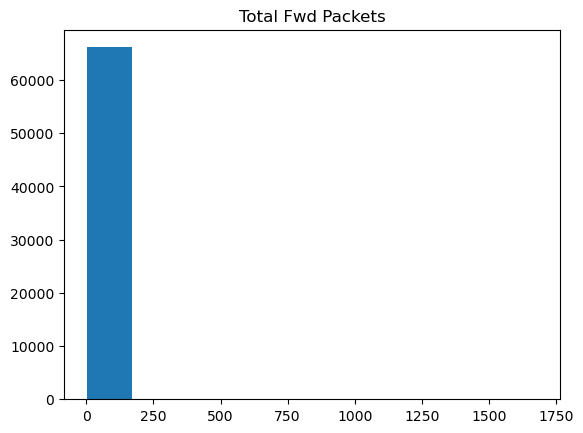

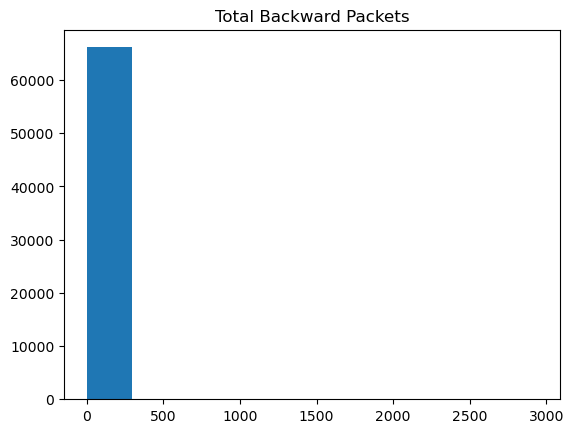

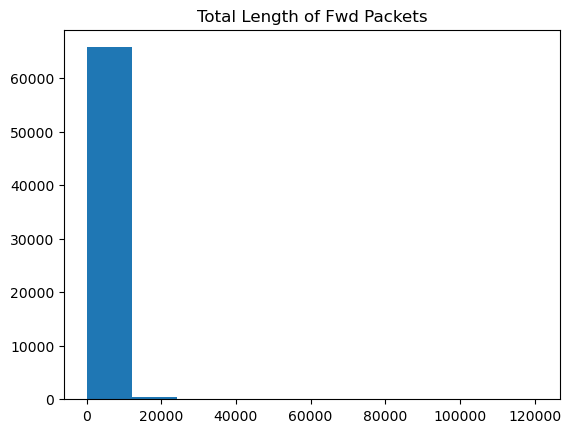

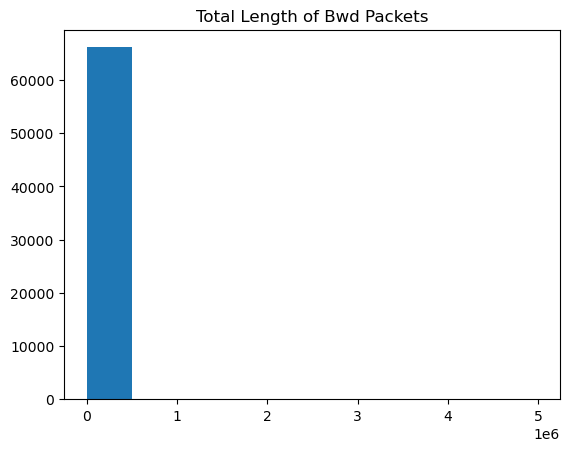

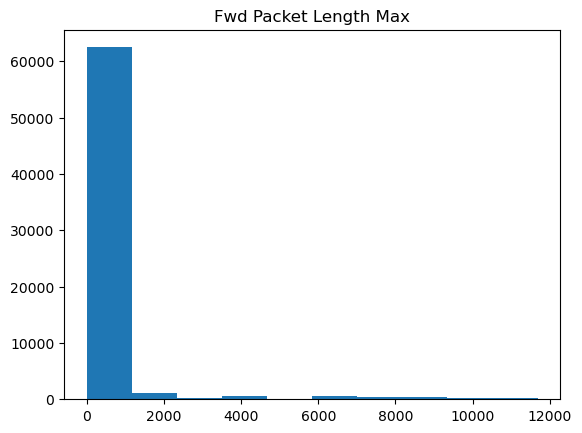

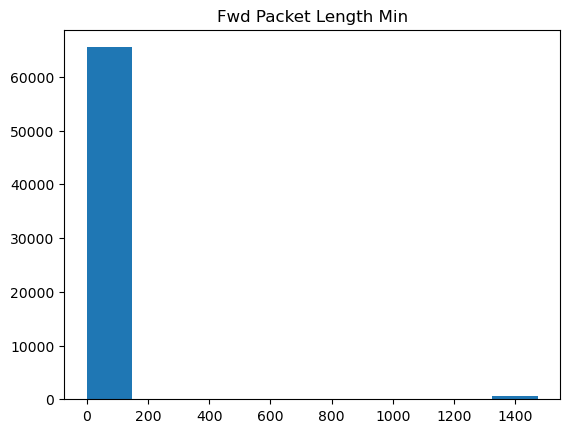

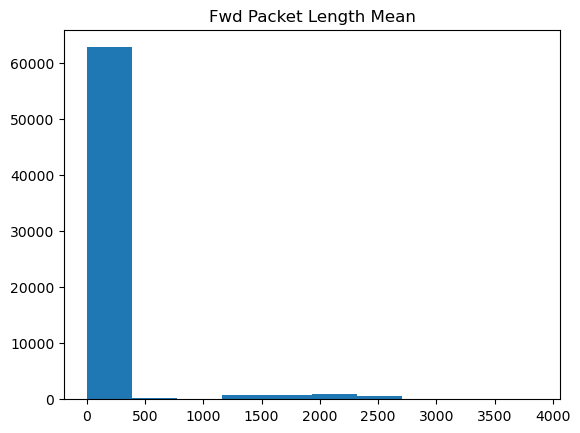

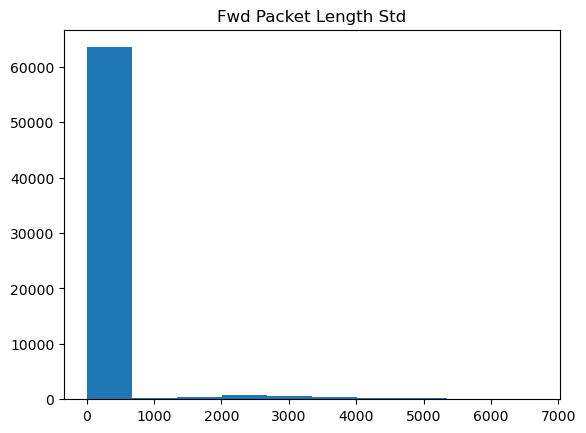

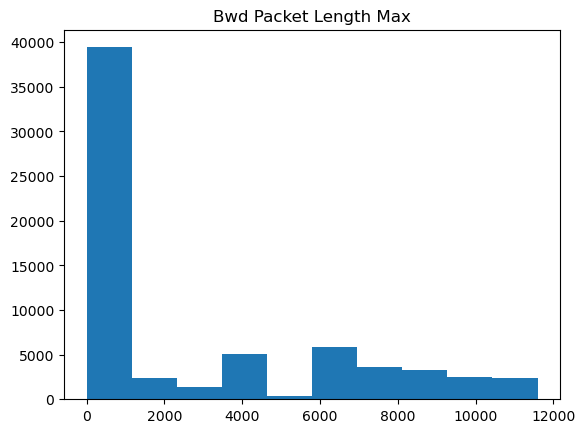

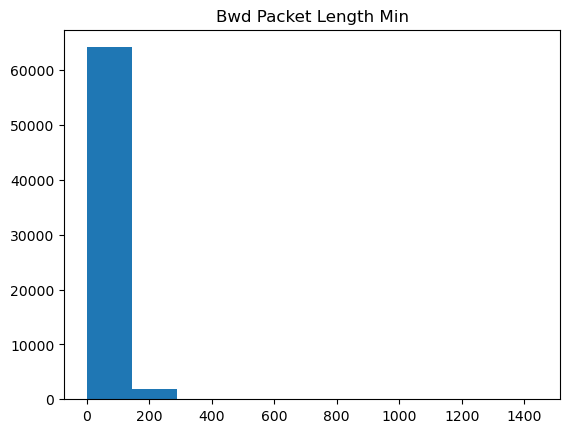

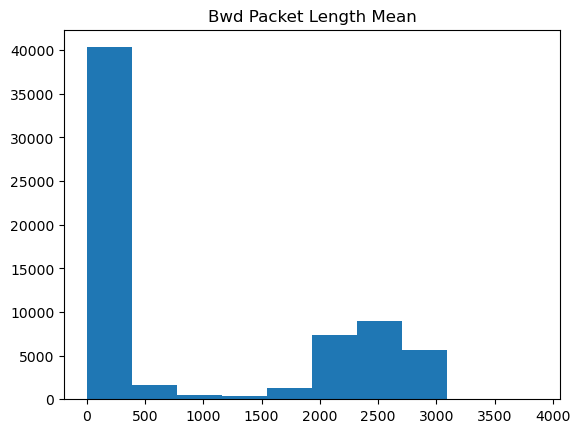

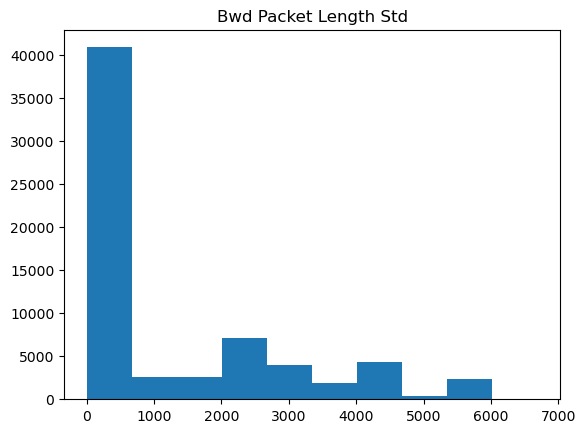

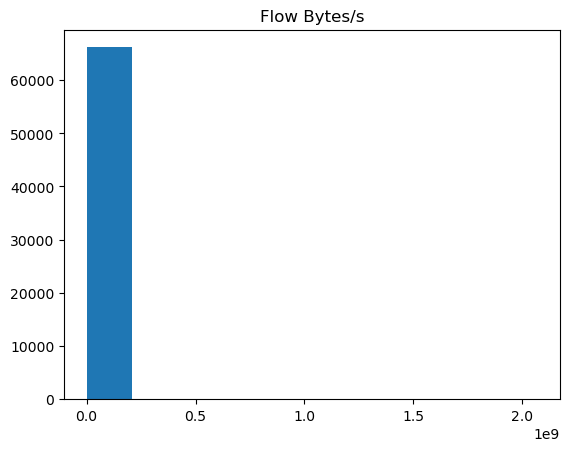

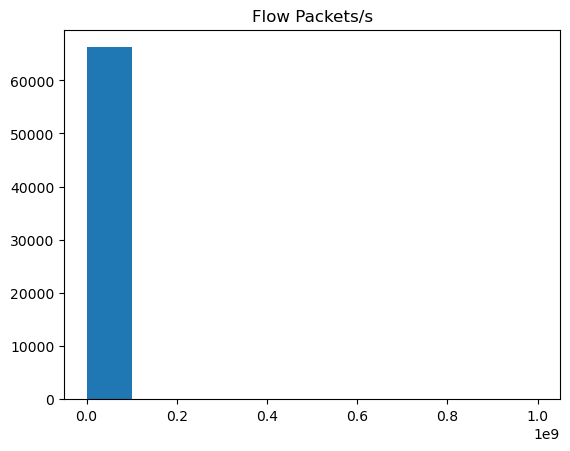

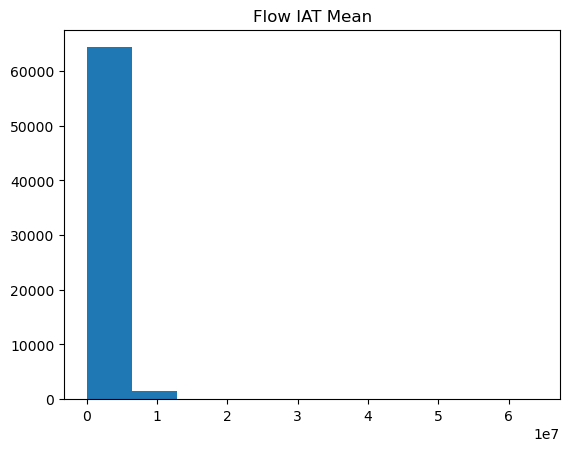

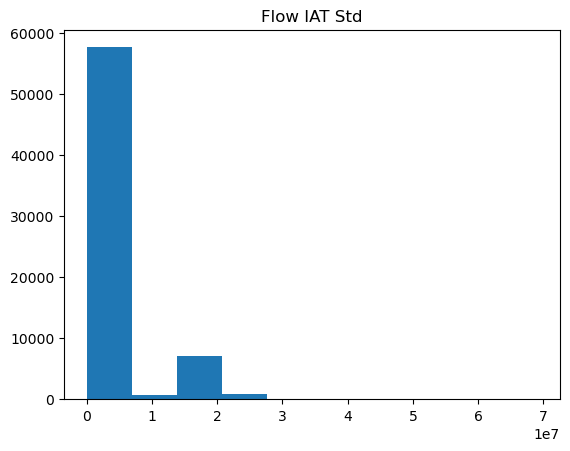

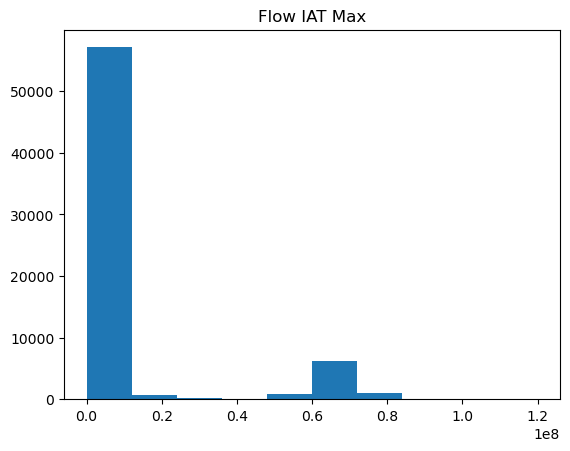

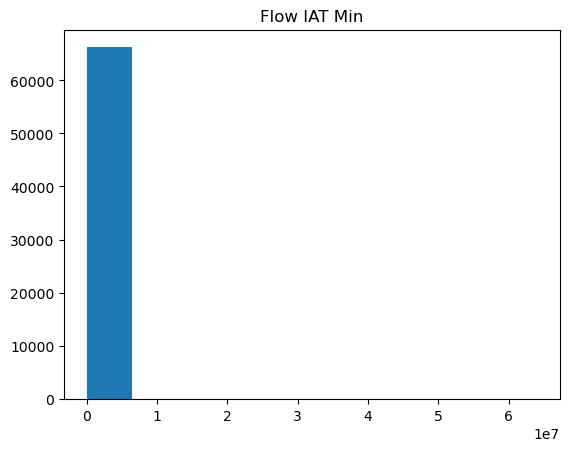

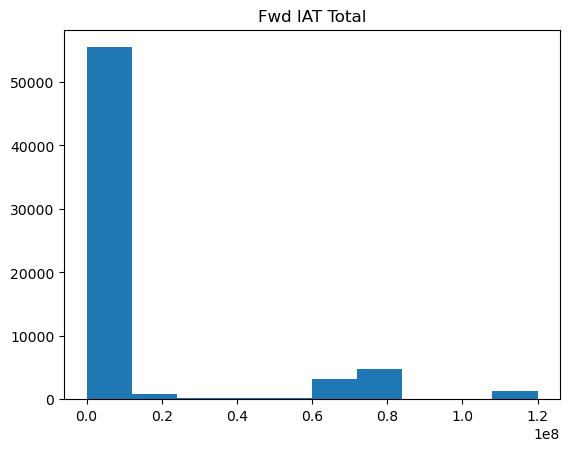

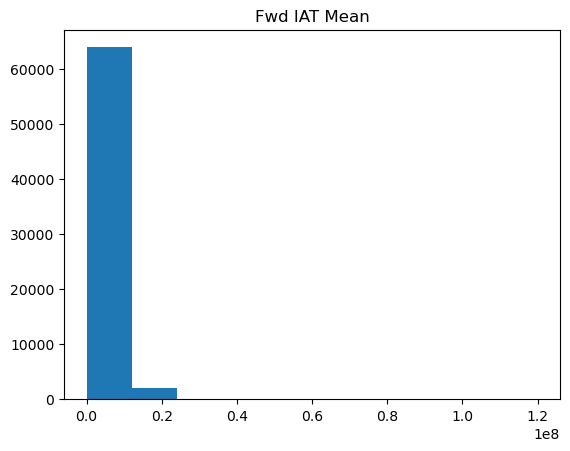

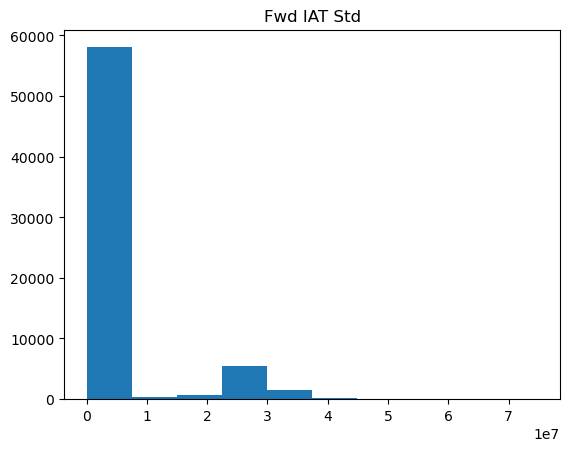

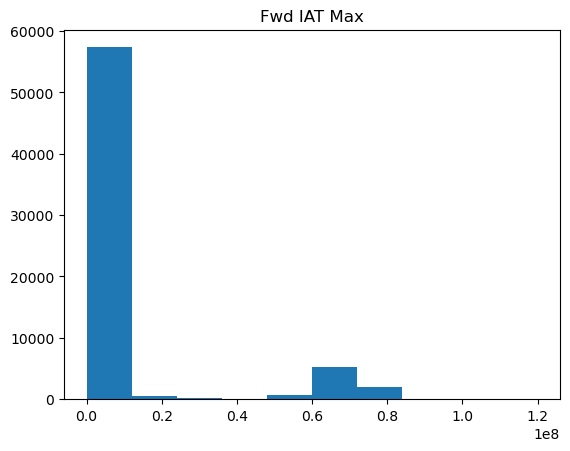

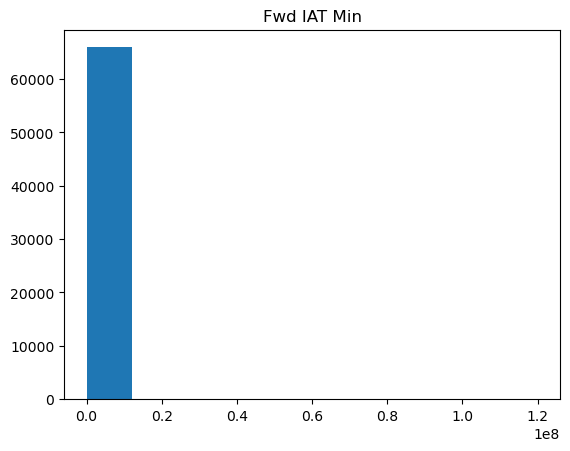

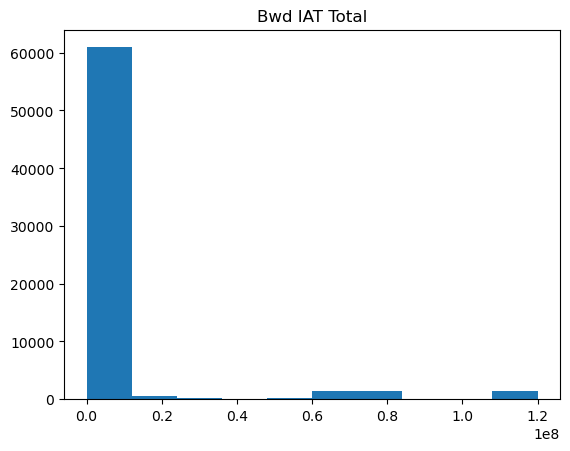

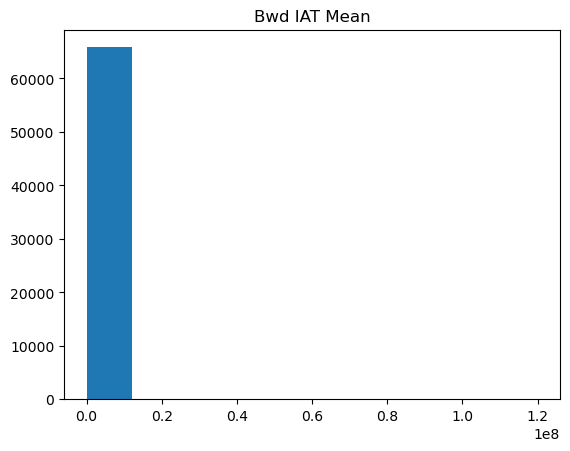

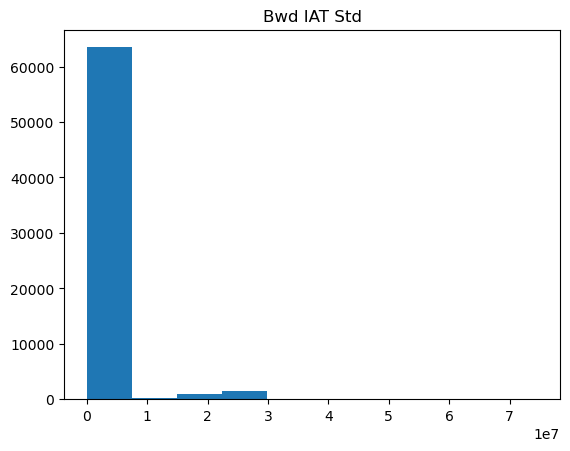

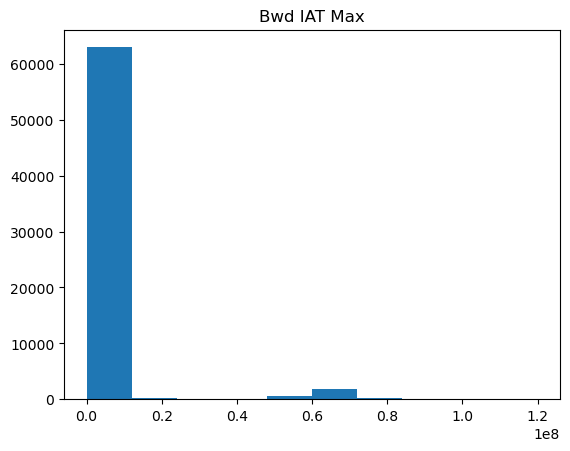

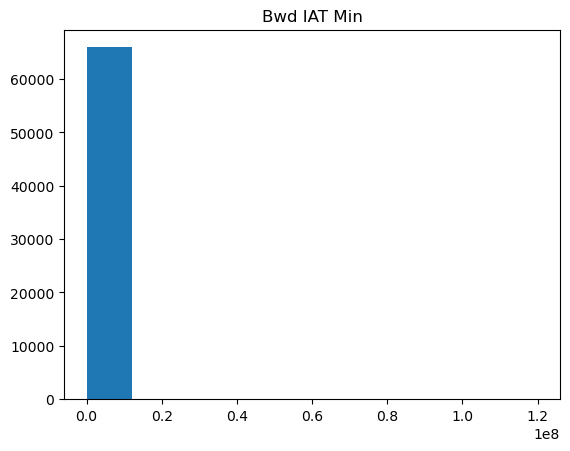

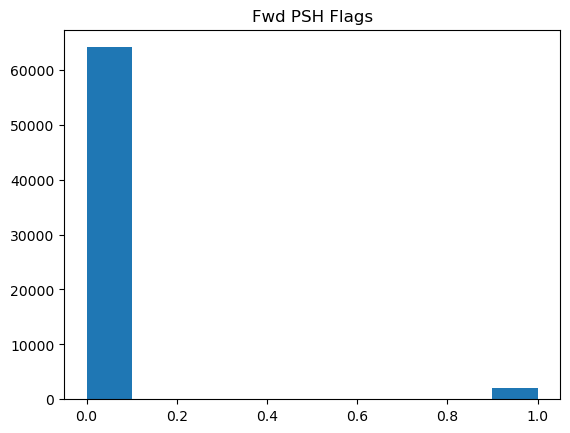

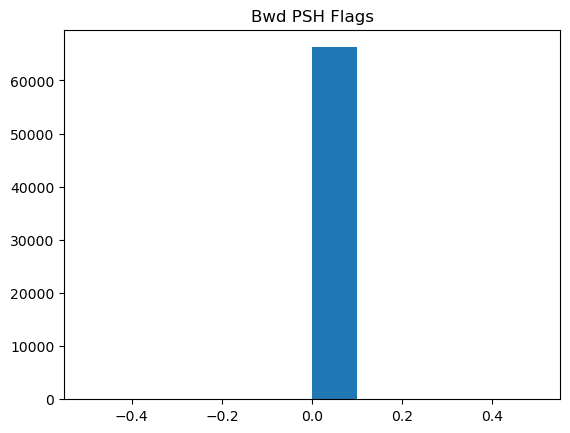

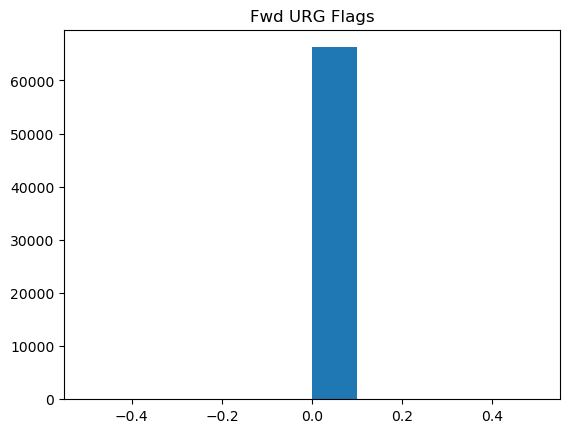

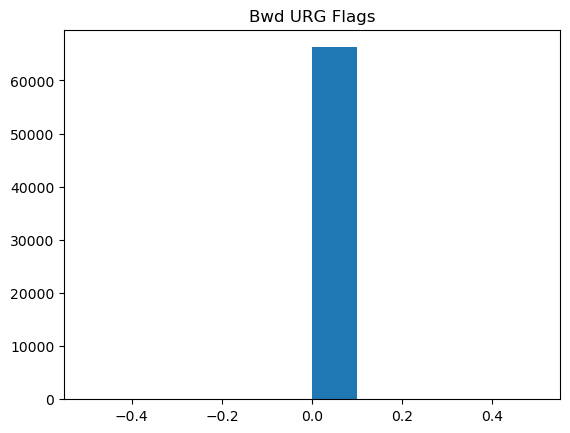

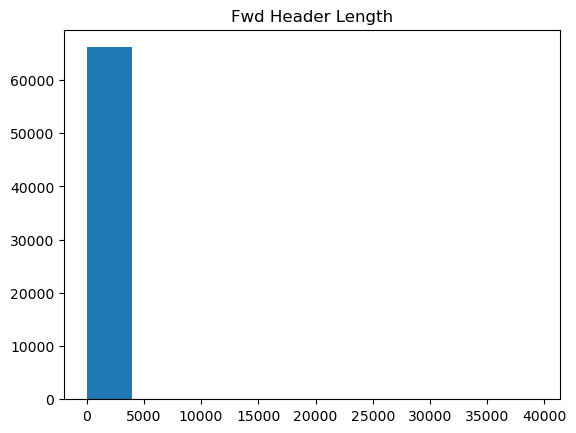

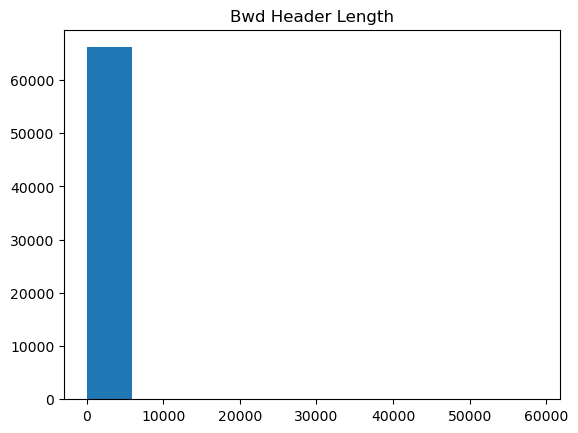

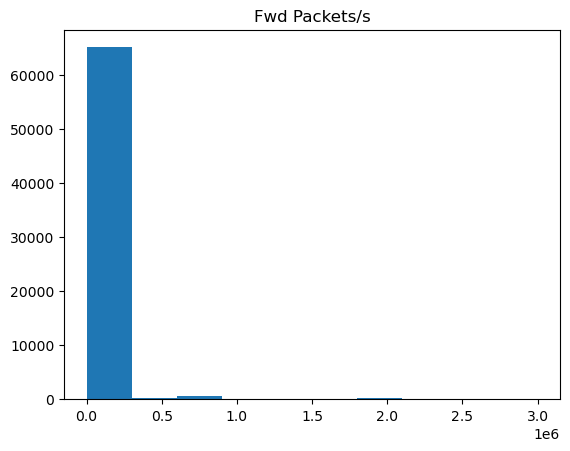

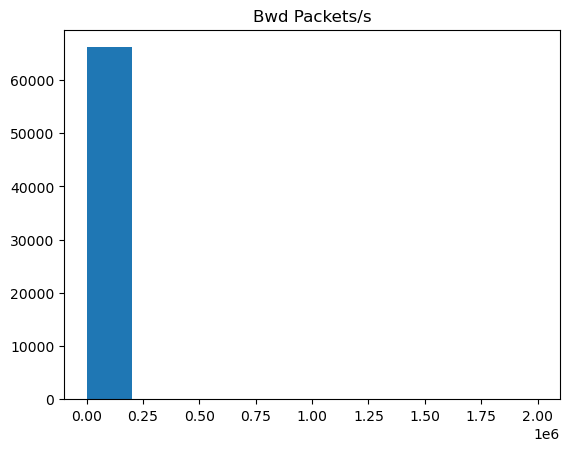

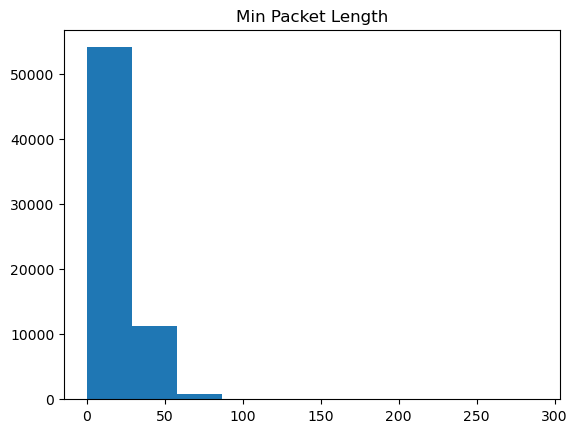

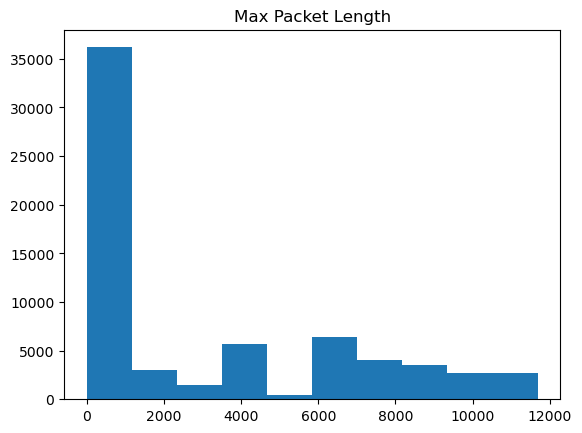

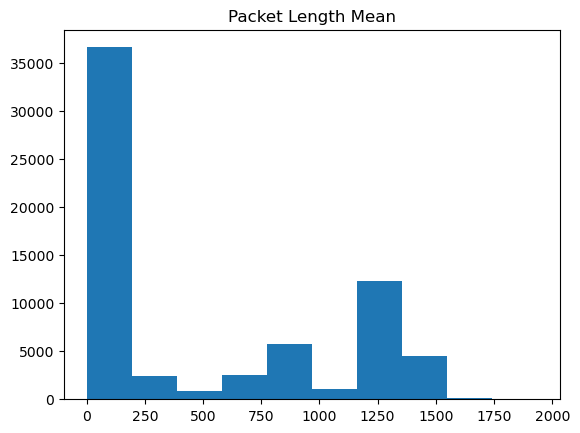

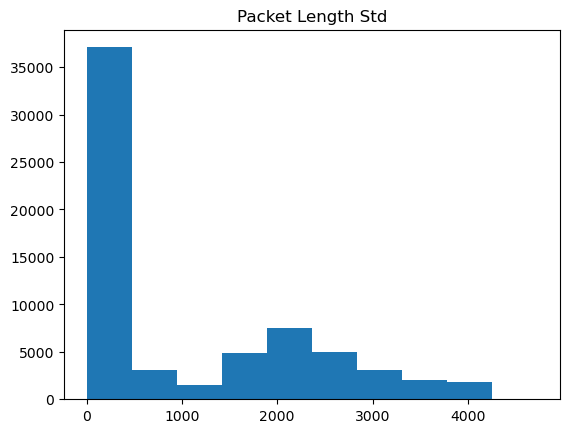

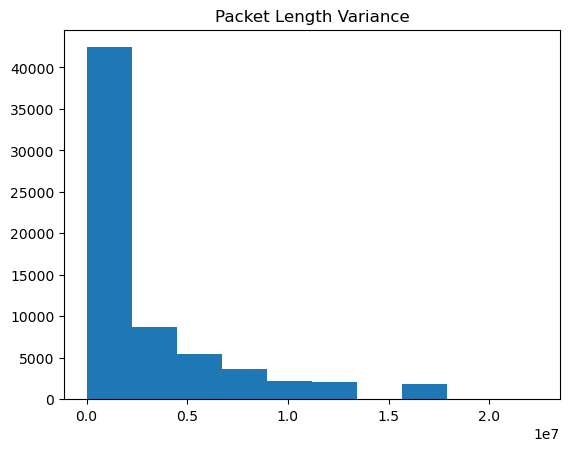

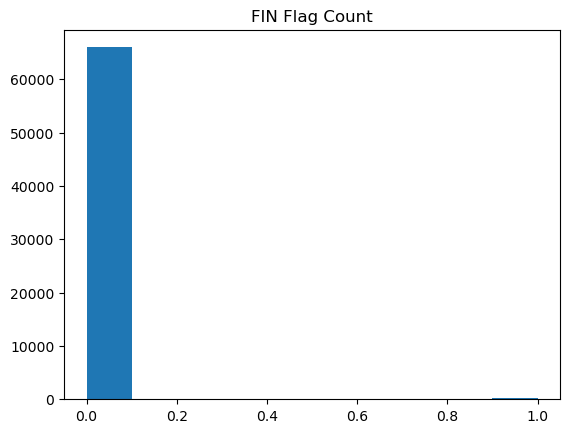

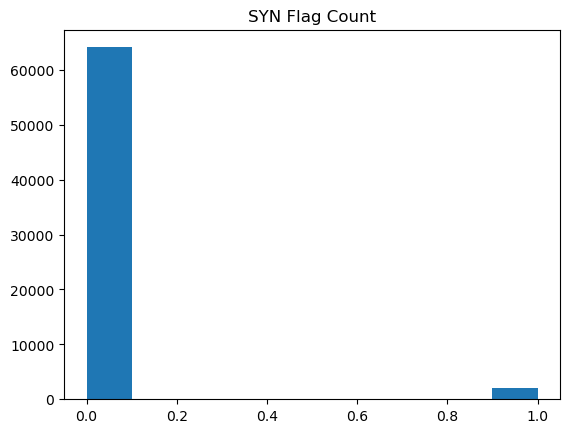

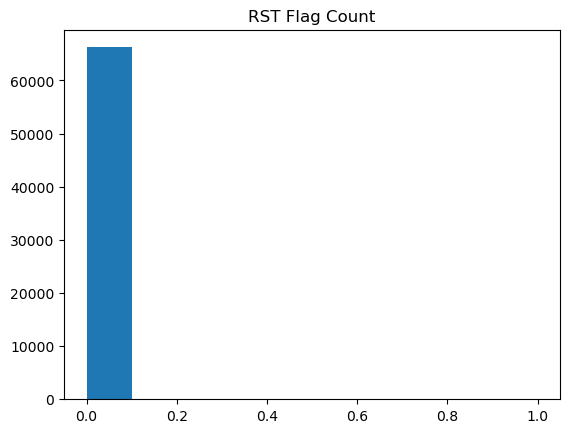

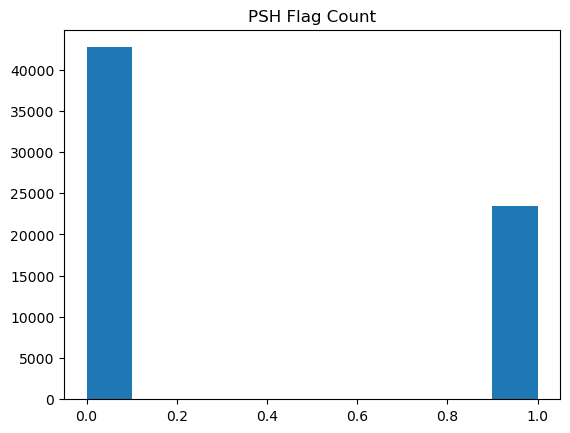

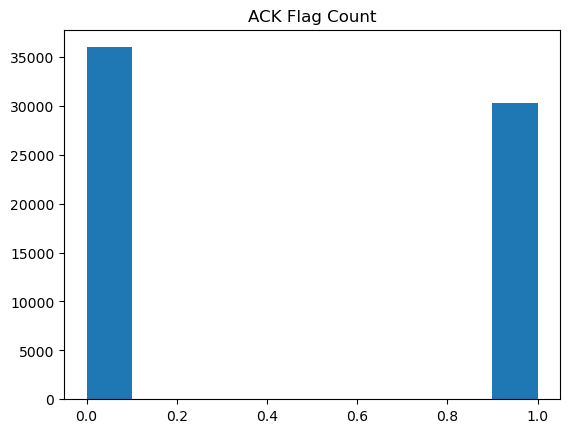

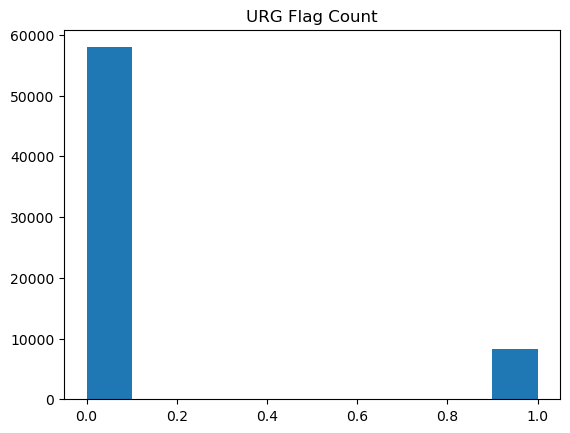

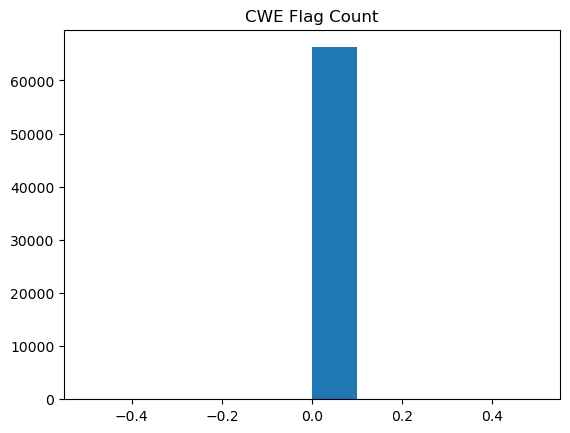

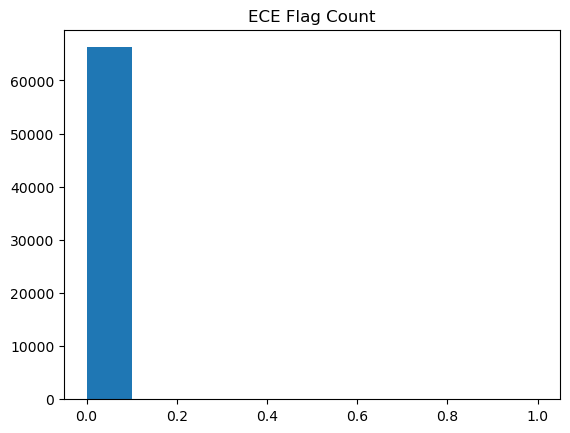

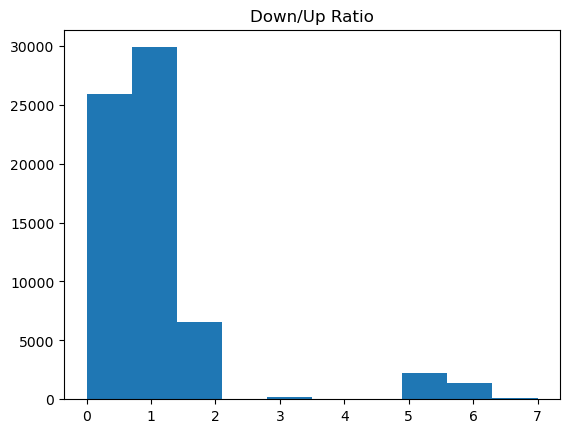

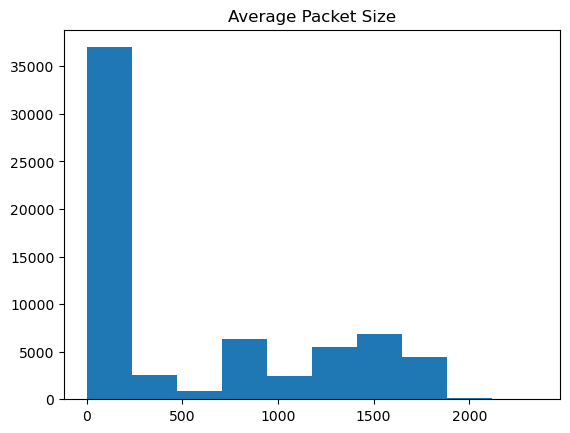

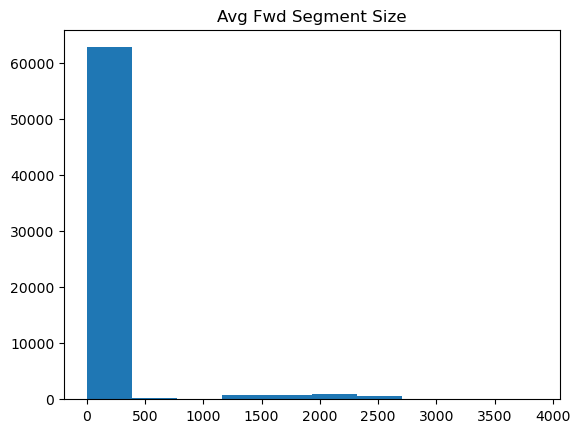

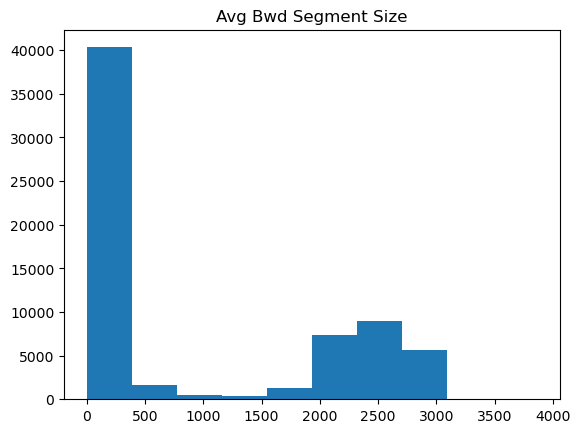

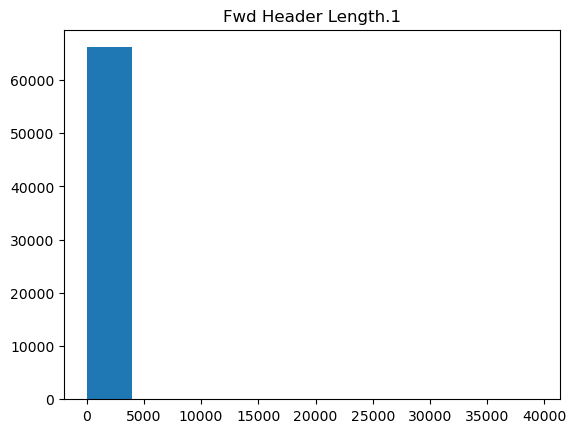

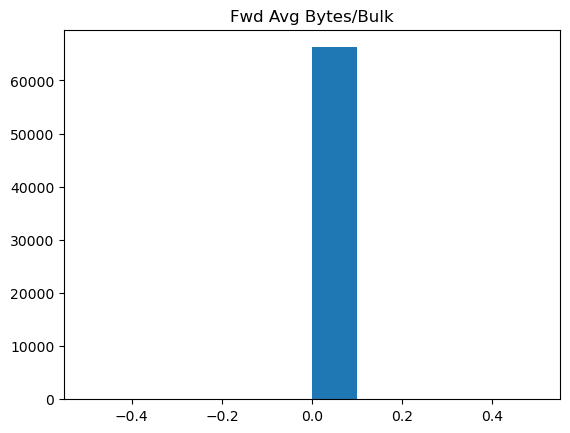

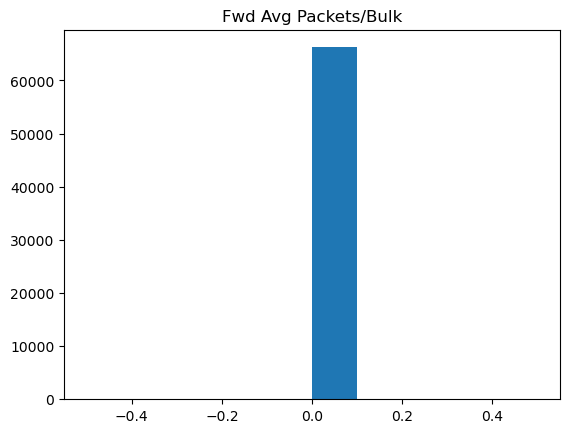

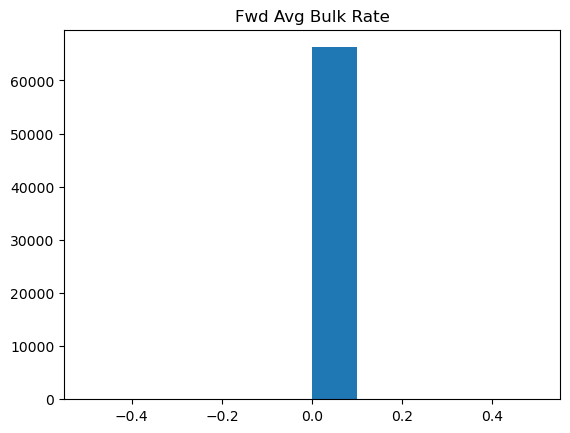

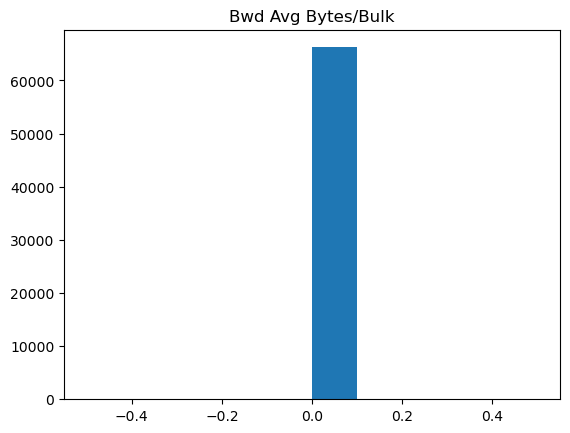

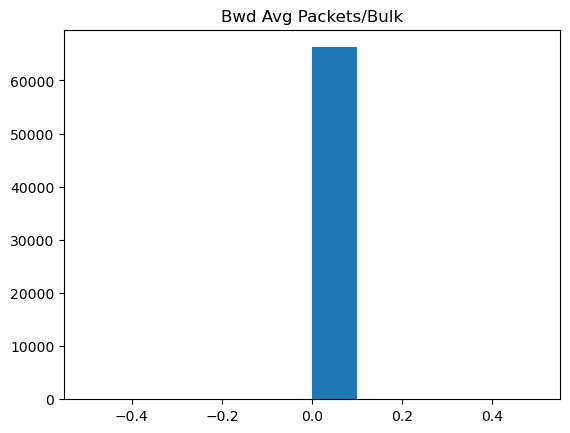

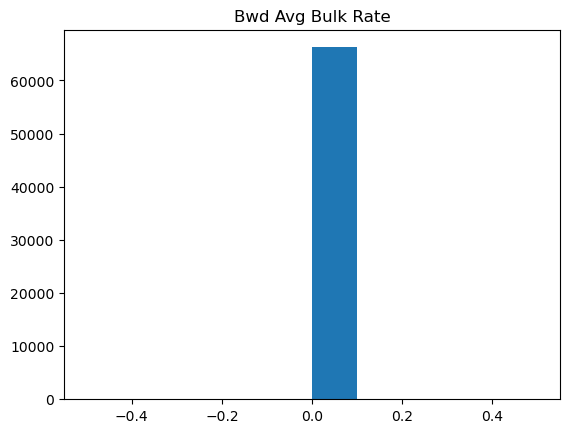

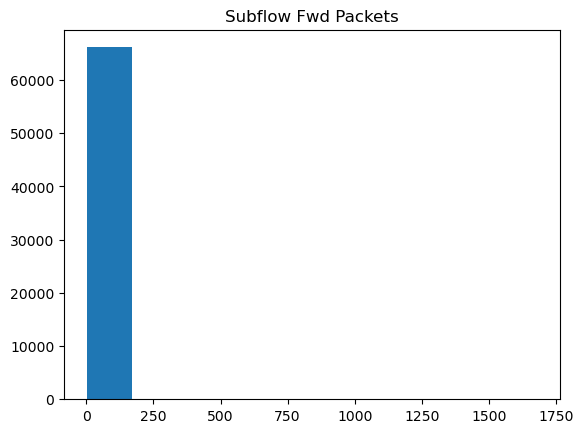

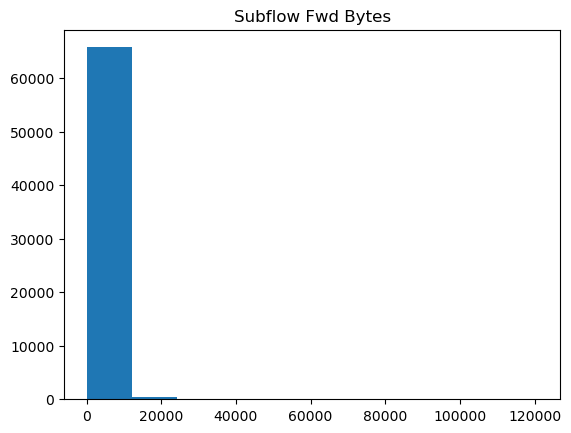

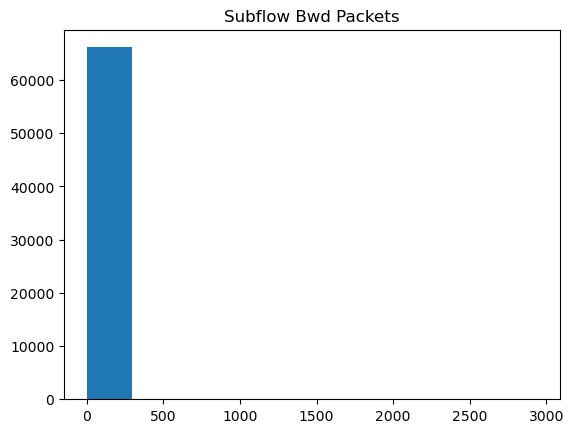

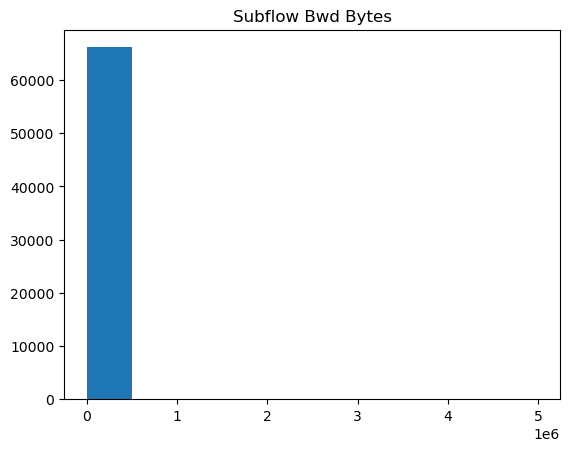

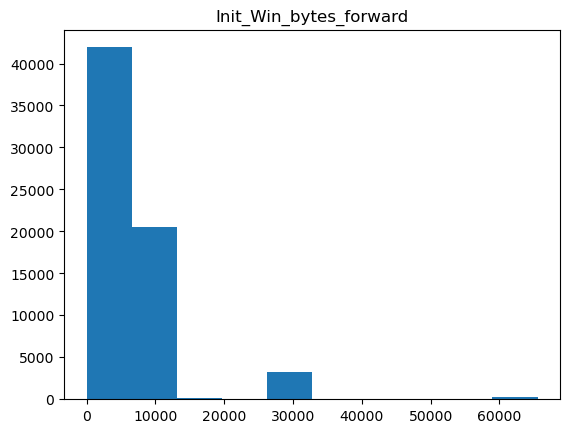

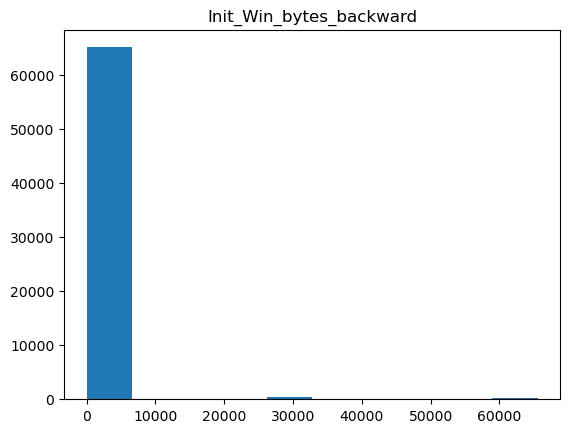

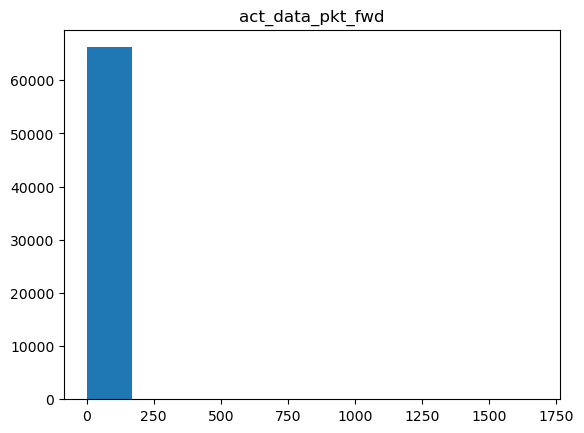

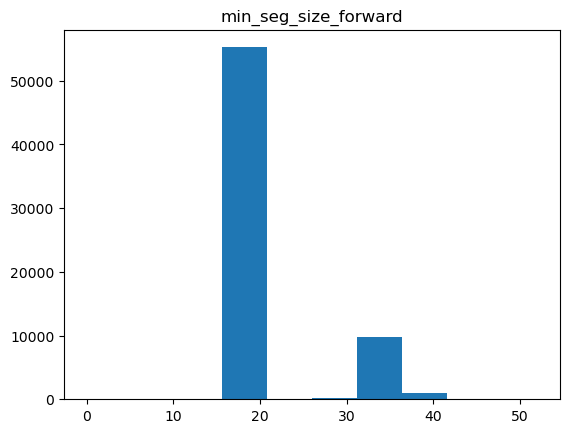

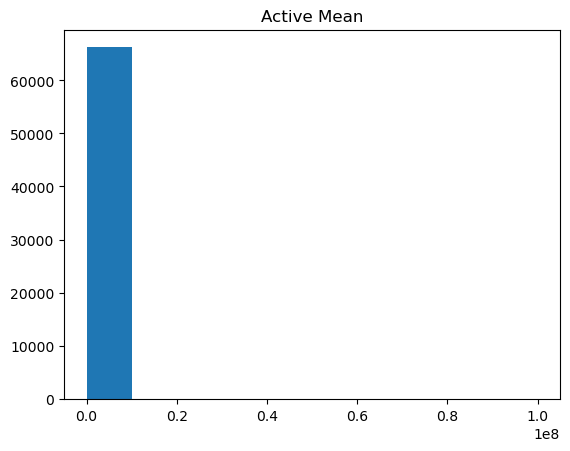

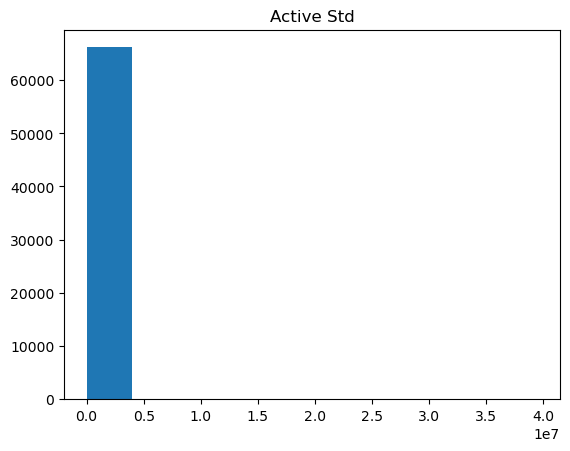

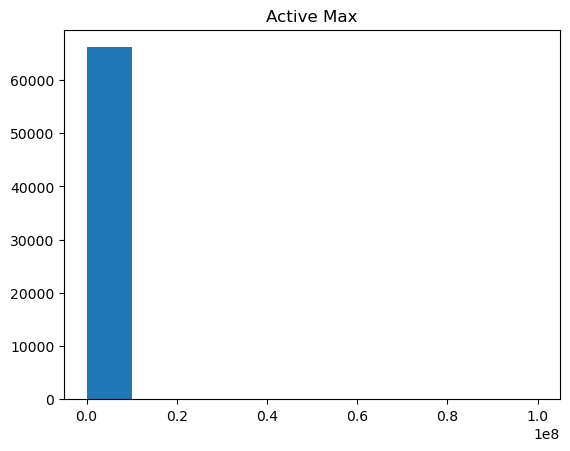

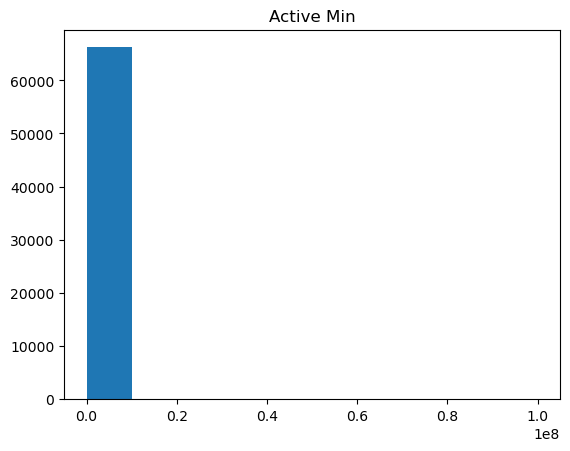

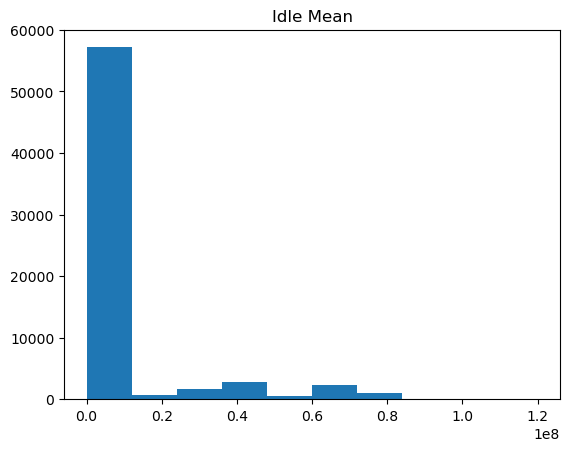

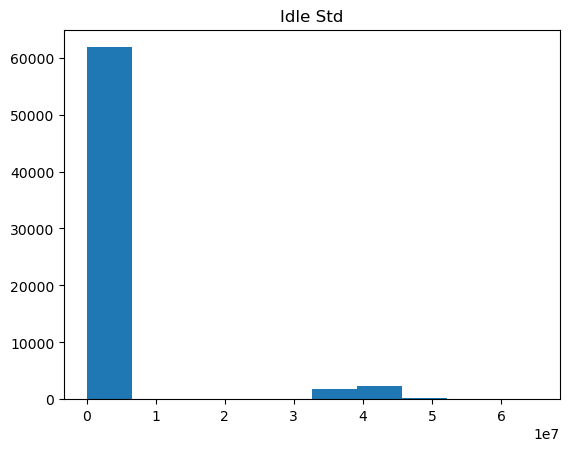

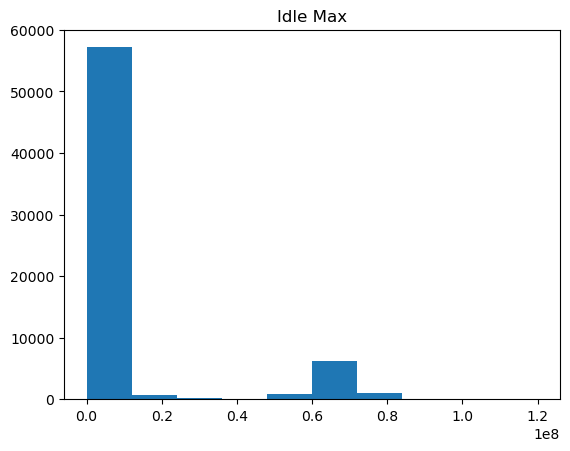

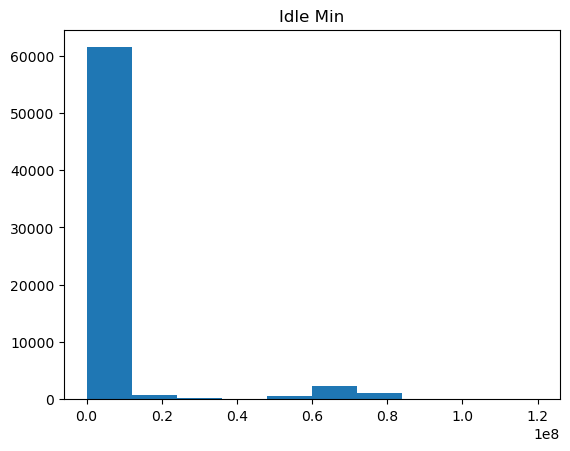

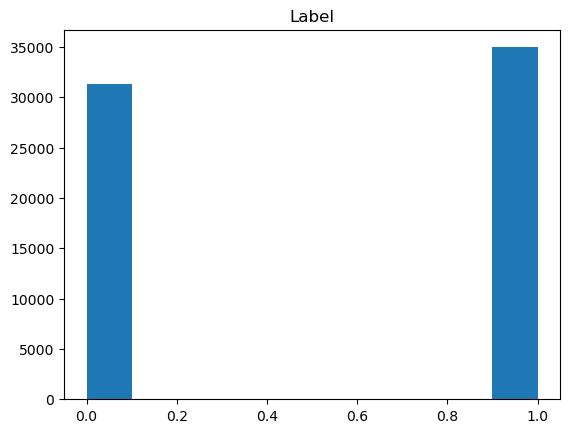

In [18]:
# Create a histogram plot for each feature
plt.figure(5)
for col in data_f.columns:
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

## Data splitting into train and test

In [19]:
# Convert into numpy array

#X1=np.array(data_f).astype(np.float64)
#y1=np.array(data_f['Label'])

In [20]:
# Split data into features and target variable
X = data_f.drop('Label', axis=1)
y = data_f['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
X_train


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
39247,80,72118228,8,6,56,11601,20,0,7.000000,5.656854,...,6.0,20.0,1966.00000,0.00000,1966.0,1966.0,35800000.0,3.830000e+07,62900000.0,8750761.0
14972,443,5103100,9,7,390,3974,209,0,43.333333,73.961138,...,7.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
46164,80,1765988,5,0,30,0,6,6,6.000000,0.000000,...,4.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
53963,80,1267894,3,6,26,11601,20,0,8.666667,10.263203,...,2.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
21837,443,115271225,20,18,1296,5762,844,0,64.800000,190.257056,...,19.0,20.0,29991.45455,19089.75116,83429.0,22058.0,10000000.0,4.993358e+02,10000000.0,9999448.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,80,9153088,5,0,30,0,6,6,6.000000,0.000000,...,4.0,20.0,1615.00000,0.00000,1615.0,1615.0,9151473.0,0.000000e+00,9151473.0,9151473.0
6265,37337,60,1,1,0,0,0,0,0.000000,0.000000,...,0.0,32.0,0.00000,0.00000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
54886,80,41899,3,6,26,11601,20,0,8.666667,10.263203,...,2.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
860,53,212,2,2,126,382,63,63,63.000000,0.000000,...,1.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000e+00,0.0,0.0


In [22]:
X_test


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
55306,80,4136764,4,0,24,0,6,6,6.000000,0.000000,...,3.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
14845,88,93,1,4,0,12,0,0,0.000000,0.000000,...,0.0,32.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
54879,80,54170,3,4,26,11601,20,0,8.666667,10.263203,...,2.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
10240,53,4515097,6,6,204,570,34,34,34.000000,0.000000,...,5.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
6756,443,115270090,20,18,818,5619,365,0,40.900000,91.646288,...,19.0,20.0,28192.18182,18605.02335,84196.0,21967.0,10000000.0,1911.759613,10000000.0,10000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43915,80,693680,3,6,26,11607,20,0,8.666667,10.263203,...,2.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
28319,80,35835,3,4,26,11601,20,0,8.666667,10.263203,...,2.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
25193,80,8802949,5,0,30,0,6,6,6.000000,0.000000,...,4.0,20.0,2039.00000,0.00000,2039.0,2039.0,8800910.0,0.000000,8800910.0,8800910.0
11327,53,132,2,2,64,96,32,32,32.000000,0.000000,...,1.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0


In [23]:
y_train


39247    1
14972    0
46164    1
53963    1
21837    0
        ..
37194    1
6265     0
54886    1
860      0
15795    0
Name: Label, Length: 46365, dtype: int64

In [24]:
y_test

55306    1
14845    0
54879    1
10240    0
6756     0
        ..
43915    1
28319    1
25193    1
11327    0
24458    1
Name: Label, Length: 19871, dtype: int64

In [25]:

print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (46365, 78)
The test dataset size =  (19871, 78)



### ----------------------------Training the model--------------------------------

## Random forest

In [26]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [27]:
rf_model

RandomForestClassifier(n_estimators=50, random_state=42)

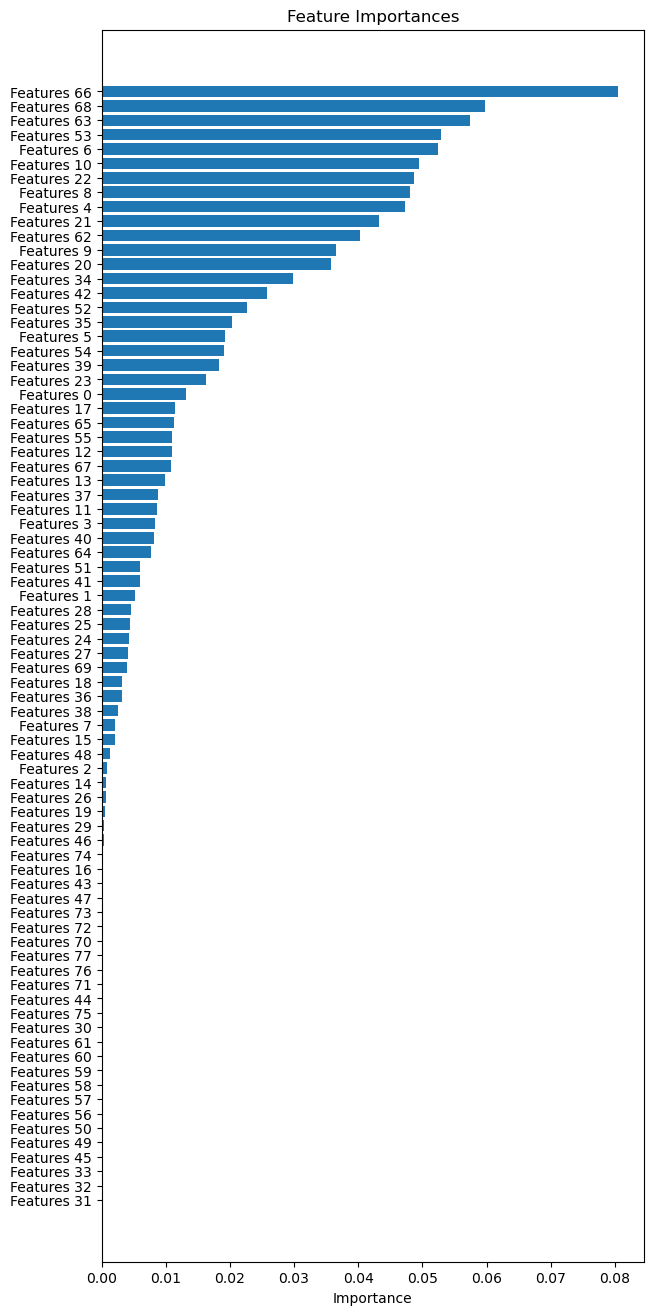

In [28]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]  # Replace with your column names

# Plotting feature importances horizontally
plt.figure(figsize=(7, 16))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

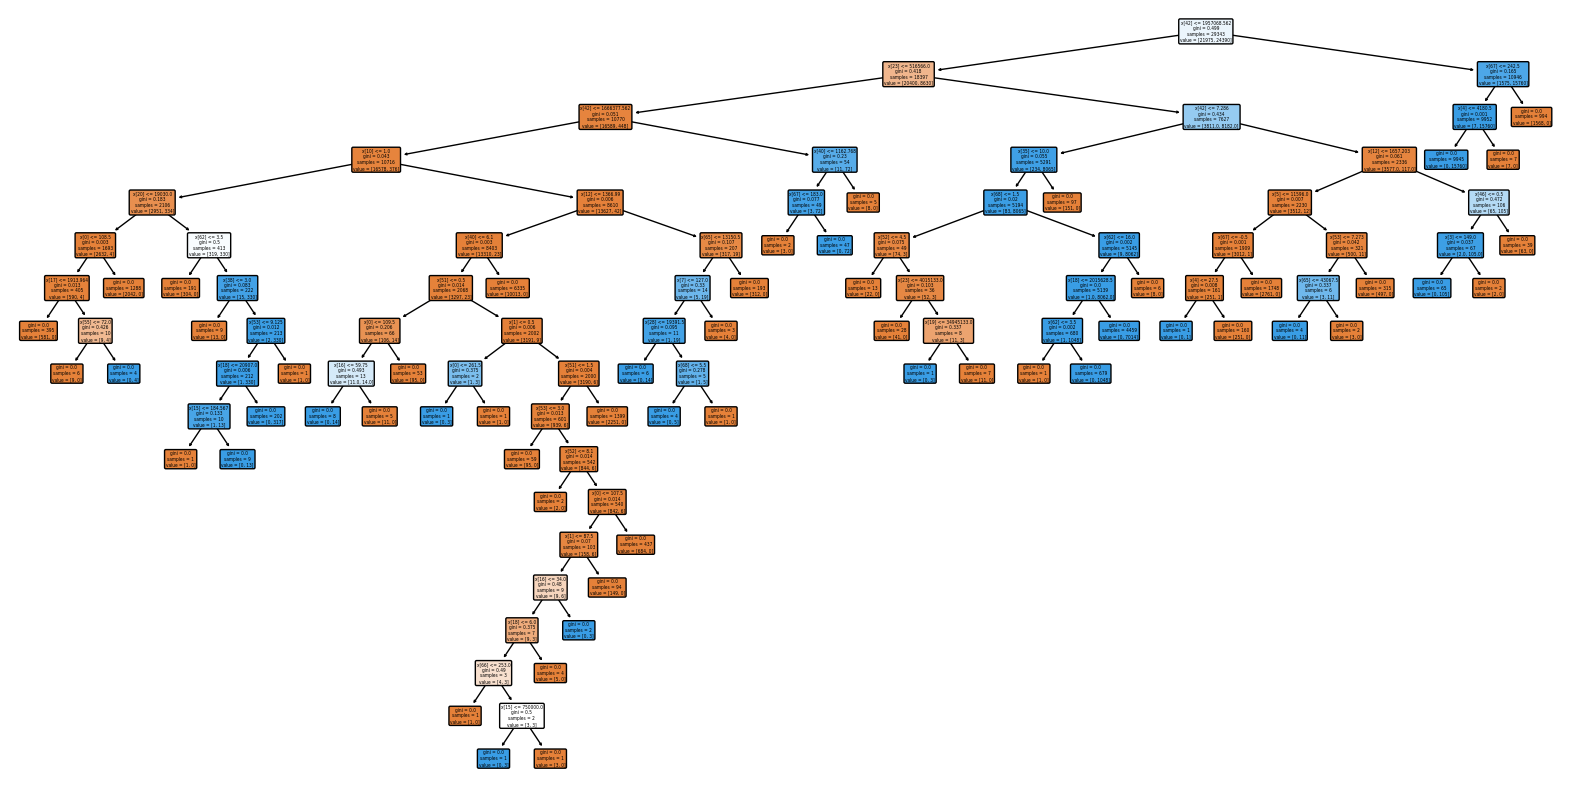

In [29]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

## Model evaluation

In [30]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [31]:

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.9995
F1 Score: 0.9995
Precision: 1.0000
Recall: 0.9990


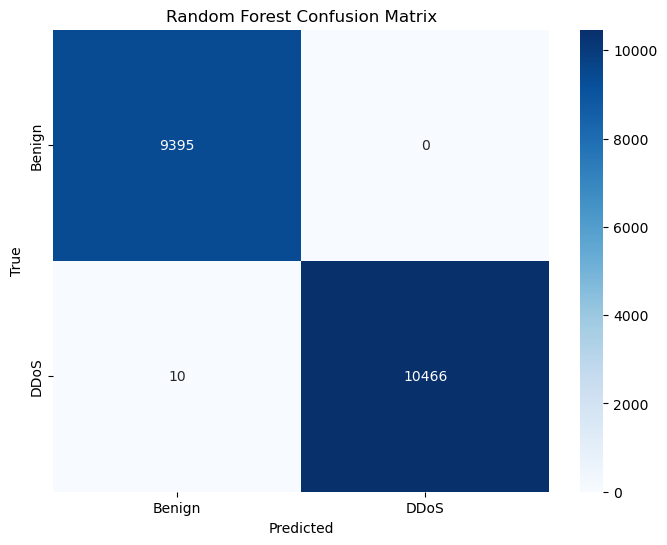

In [32]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

In [33]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

## Evaluate logistic regression

In [34]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [35]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9441
F1 Score: 0.9494
Precision: 0.9089
Recall: 0.9936


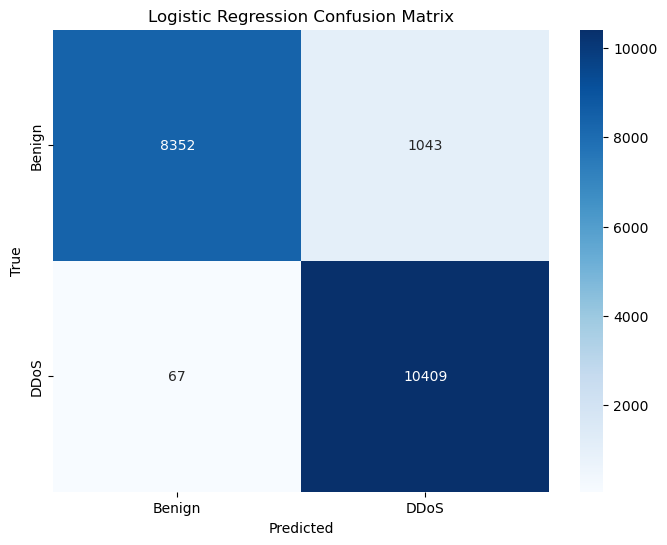

In [36]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')

## Neural Network

In [37]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

In [38]:
nn_model

MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)

### Evaluate Neural Network

In [39]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9834
F1 Score: 0.9843
Precision: 0.9814
Recall: 0.9872


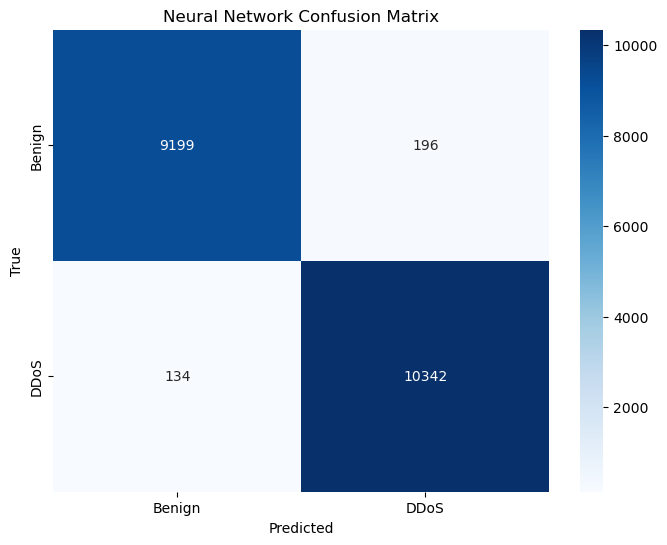

In [40]:
# Confusion Matrix for Neural Network
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')

## Model comparison

In [41]:
# Random Forest
rf_proba = rf_model.predict_proba(X_test)

# Logistic Regression
lr_proba = lr_model.predict_proba(X_test)


# Neural Network
nn_proba = nn_model.predict_proba(X_test)

In [42]:
# Combine predictions for ROC curve

# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

# Calculate ROC curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)

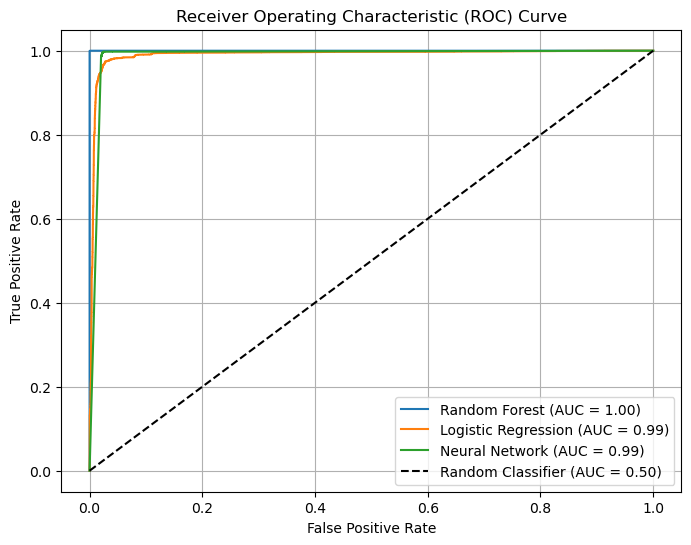

In [43]:

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')

# Plot ROC curve for random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [44]:
RF_list=[rf_accuracy,rf_f1 ,rf_precision,rf_recall ]
LR_list=[lr_accuracy,lr_f1,lr_precision,lr_recall]
NN_list=[nn_accuracy ,nn_f1 ,nn_precision,nn_recall ]


In [45]:
cols=['Accuracy','F1_score','Precision','Recall']
ind=['Random Forest','Logistic Regression','Neural Network']
model_df=pd.DataFrame(zip(RF_list,LR_list,NN_list),columns=ind,index=cols)
model_df.T

,Accuracy,F1_score,Precision,Recall
Random Forest,0.999497,0.999522,1.000000,0.999045
Logistic Regression,0.944140,0.949380,0.908924,0.993604
Neural Network,0.983393,0.984296,0.981401,0.987209


In [46]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Assuming you already trained this model
model = RandomForestClassifier()
model.fit(X_train, y_train)  # replace with your variables if different

# Save the trained model
joblib.dump(model, "ddos_model.pkl")
print("Model saved as ddos_model.pkl")


Model saved as ddos_model.pkl


In [47]:
print(df.columns)


Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [48]:
print(df.columns.tolist())


['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [49]:
df.columns = df.columns.str.strip()


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

# Assuming you already have your features and target
# Replace X and y with your actual feature and label variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Save the model
joblib.dump(lr_model, "logistic_model.pkl")
print("✅ Logistic Regression model saved as logistic_model.pkl")


✅ Logistic Regression model saved as logistic_model.pkl


In [51]:
# Remove rows with any NaN
df = df.dropna()
# Fill missing values with 0 (or use mean, median, etc.)
df = df.fillna(0)
df = df.fillna(df.mean(numeric_only=True))




In [52]:
X = df.drop("Label", axis=1)
y = df["Label"]

# Split, Train, Save
...


Ellipsis

In [53]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib

# (1) Optional: Clean column names
df.columns = df.columns.str.strip()

# (2) Separate features and label
X = df.drop("Label", axis=1)   # Use the correct label column name
y = df["Label"]                # Adjust if your label column is named differently

# (3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# (4) Train Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# (5) Save the model and columns
joblib.dump(model, "decision_tree_full.pkl")
joblib.dump(X.columns.tolist(), "feature_names_DT.pkl")

print("✅ Model and feature names saved.")


✅ Model and feature names saved.


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib



# Clean column names
df.columns = df.columns.str.strip()

# Drop missing values (or use fillna if you prefer)
df = df.dropna()

# Separate features and label
X = df.drop("Label", axis=1)
y = df["Label"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Save the model and feature names
joblib.dump(knn, "knn_model.pkl")
joblib.dump(X.columns.tolist(), "feature_names_knn.pkl")

print("✅ KNN model and feature names saved.")


✅ KNN model and feature names saved.


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib


df.columns = df.columns.str.strip()  # Clean column names
df = df.dropna()  # Remove any rows with missing values

# Step 2: Prepare features and label
X = df.drop("Label", axis=1)
y = df["Label"]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 5: Save model and feature list
joblib.dump(log_reg, "logistic_model.pkl")
joblib.dump(X.columns.tolist(), "feature_names.pkl")

print("✅ Logistic Regression model and features saved successfully!")


✅ Logistic Regression model and features saved successfully!
